This notebook is a simple implementation of Generative Adversarial Network (GAN) using MNIST dataset. BCE loss has been used for both Discriminator and Generator. 

# Initialize

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
from torch.utils.data import DataLoader

import torchvision
import torchvision.datasets as datasets 
import torchvision.transforms as transforms

import ipywidgets as widgets
from ipywidgets import Layout, interact, IntSlider

# Set hyperparameters

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# ------------------------------------ LOAD Data
image_size = [32, 32]
channels_img = 1
z_size = 100
Batch_size = 64
n_epochs = 100

cpu


# Load data

In [18]:
# ------------------------------------ LOAD Data
transformer = transforms.Compose([
    transforms.Resize((image_size[0], image_size[1])),
    transforms.ToTensor(),
])

dataset = datasets.MNIST(root='dataset/', transform=transformer, train=True, download=True)
dataset = torch.utils.data.Subset(dataset, indices=np.arange(10000))
loader = DataLoader(dataset, shuffle=True, batch_size=Batch_size)

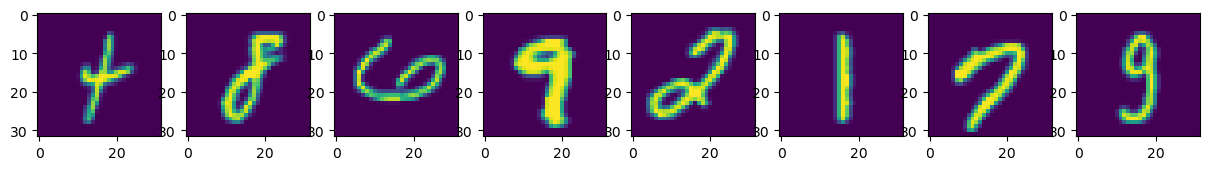

In [19]:
subset = next(iter(loader))[0]
fig, ax = plt.subplots(1,8, figsize=(15,3))
for i in range(8):
    ax[i].imshow(subset[i].squeeze())

# Define GAN architecture

### Discriminator

In [40]:
class Discriminator(nn.Module):
    def __init__(self, channels_img):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(channels_img, 4, 3, padding='same')
        self.maxpool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(4,16, 3, padding='same')
        self.maxpool2 = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(16, 32, 3, padding='same')
        self.maxpool3 = nn.MaxPool2d(2)
        self.l1 = nn.Linear(32*4*4, 1)

    def loss(self, real_images, fake_images):
        labels_real = torch.ones(real_images.shape[0], 1)
        labels_fake = torch.zeros(fake_images.shape[0], 1)
        labels = torch.cat([labels_real, labels_fake], dim=0)
        
        images = torch.cat([real_images, fake_images], dim=0)      
        
        loss = nn.BCELoss()(disc(images), labels)
        return loss
    
    def forward(self, x):
        x = f.relu( self.conv1(x) )
        x = self.maxpool1(x)
        x = f.relu( self.conv2(x) )
        x = self.maxpool2(x)
        x = f.relu( self.conv3(x) )
        x = self.maxpool3(x)
        x = x.reshape(x.shape[0], -1)
        x = self.l1(x)
        x = f.sigmoid(x)
        return x

# Generator

In [41]:
class Generator(nn.Module):
    def __init__(self, z_size):
        super(Generator, self).__init__()
        self.l1 = nn.Linear(z_size, 32*8*8)
        self.conv1 = nn.Conv2d(32, 16, 3, padding='same')
        self.upsample1 = nn.Upsample(scale_factor=2)
        self.conv2 = nn.Conv2d(16, 8, 3, padding='same')
        self.upsample2 = nn.Upsample(scale_factor=2)
        self.conv3 = nn.Conv2d(8, 1, 3, padding='same')
        
    def loss(self, disc_output):
        labels = torch.ones(fake_images.shape[0], 1)
        loss = f.binary_cross_entropy(disc_output, labels)
        return loss
    
    def forward(self, x):
        x = f.relu( self.l1(x) )
        x = x.reshape(x.shape[0], -1, 8, 8)
        x = f.leaky_relu( self.conv1(x), 0.1)
        x = self.upsample1(x)
        x = f.leaky_relu( self.conv2(x), 0.1)
        x = self.upsample2(x)
        x = f.leaky_relu( self.conv3(x), 0.1)
        return x

### Weight initialization

In [42]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            nn.init.kaiming_uniform_(m.weight.data)
            if m.bias is True:
                nn.init.kaiming_uniform_(m.bias.data)

# Instantiate a GAN

In [43]:
# ------------------------------------ Define model
disc = Discriminator(channels_img).to(device)
weights_init(disc)

gen = Generator(z_size).to(device)
weights_init(gen)

lr = 0.0002
optim_disc = optim.Adam(disc.parameters(), lr=lr, weight_decay=0.0)
optim_gen = optim.Adam(gen.parameters(), lr=lr, weight_decay=0.0)

# Train the model

.............................................................................................................................................................
[1/100]: ----------------- Loss D: 5694.27335, Loss G: 8767.85156


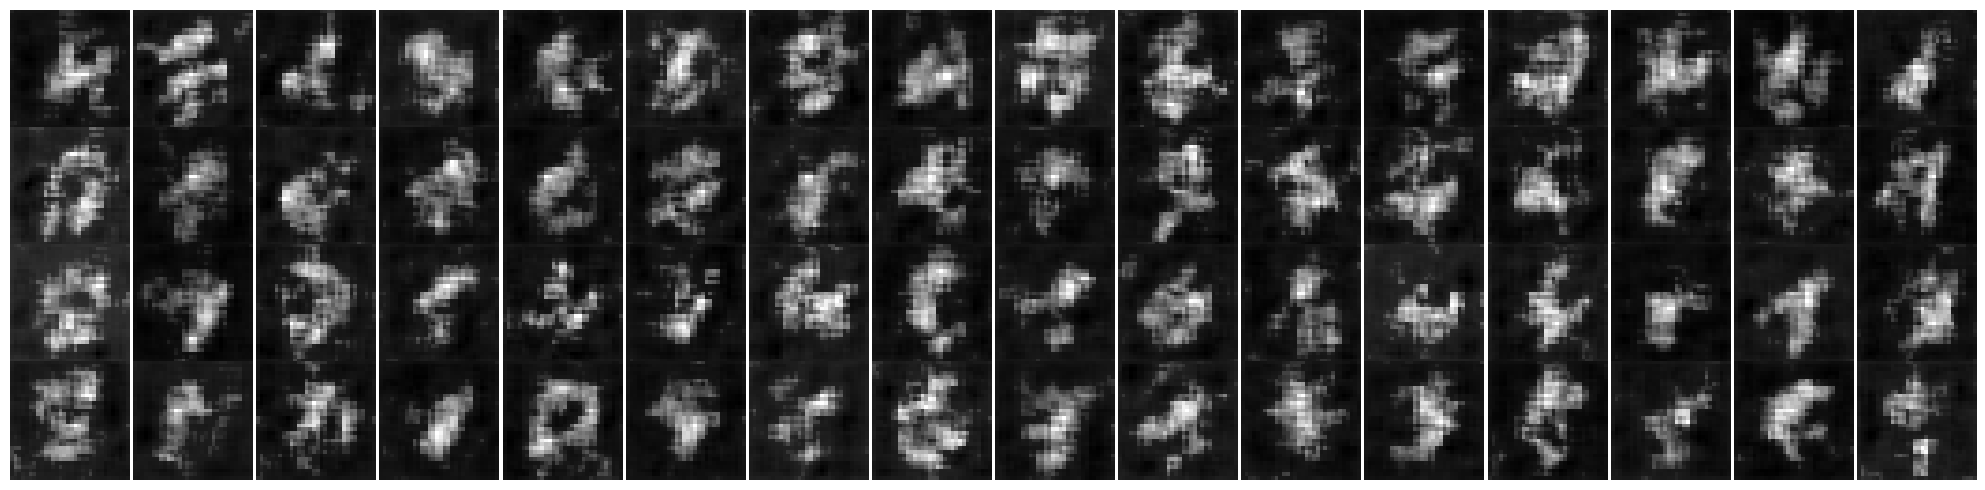

.............................................................................................................................................................
[2/100]: ----------------- Loss D: 5756.00083, Loss G: 8519.79191
.............................................................................................................................................................
[3/100]: ----------------- Loss D: 5879.29104, Loss G: 10350.77653
.............................................................................................................................................................
[4/100]: ----------------- Loss D: 5402.03887, Loss G: 10364.05789
.............................................................................................................................................................
[5/100]: ----------------- Loss D: 5101.83520, Loss G: 10366.53462
.....................................................................................................

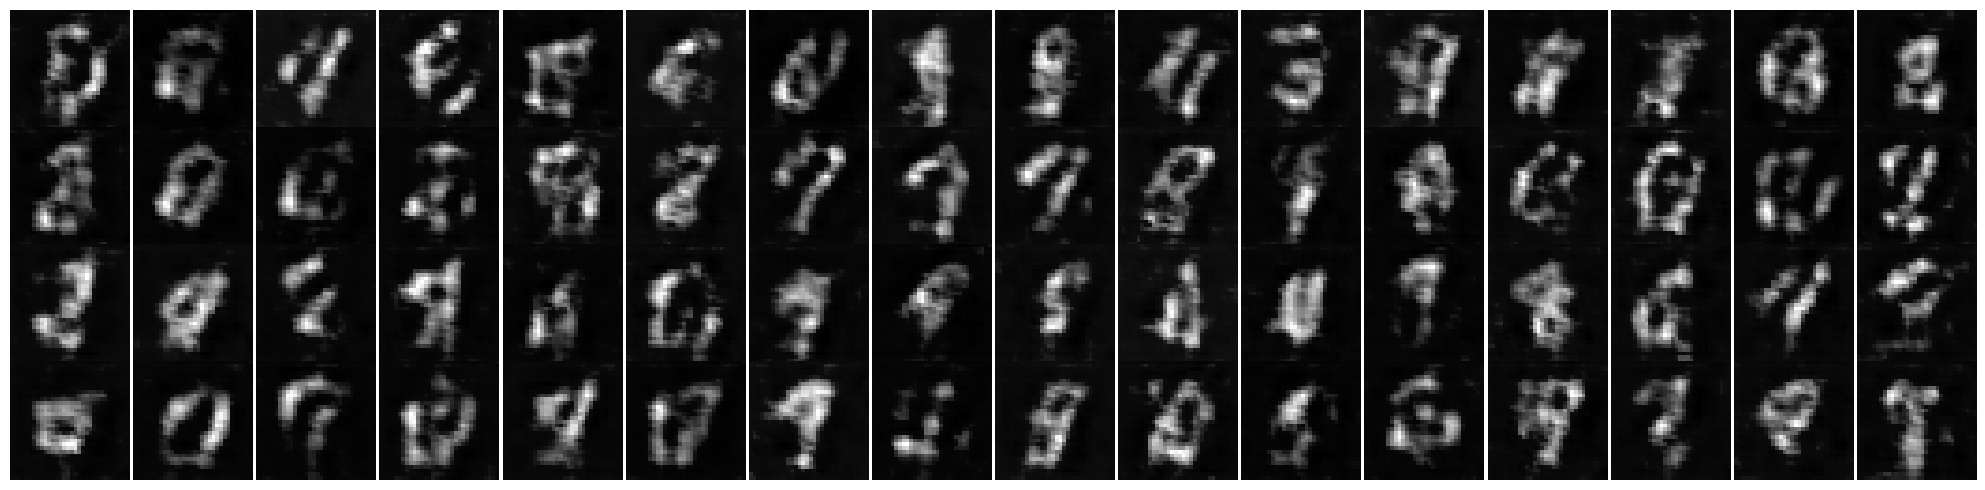

.............................................................................................................................................................
[7/100]: ----------------- Loss D: 4381.76188, Loss G: 11715.36714
.............................................................................................................................................................
[8/100]: ----------------- Loss D: 3735.47786, Loss G: 13224.91466
.............................................................................................................................................................
[9/100]: ----------------- Loss D: 3447.33715, Loss G: 14368.80986
.............................................................................................................................................................
[10/100]: ----------------- Loss D: 3406.23412, Loss G: 14853.90453
...................................................................................................

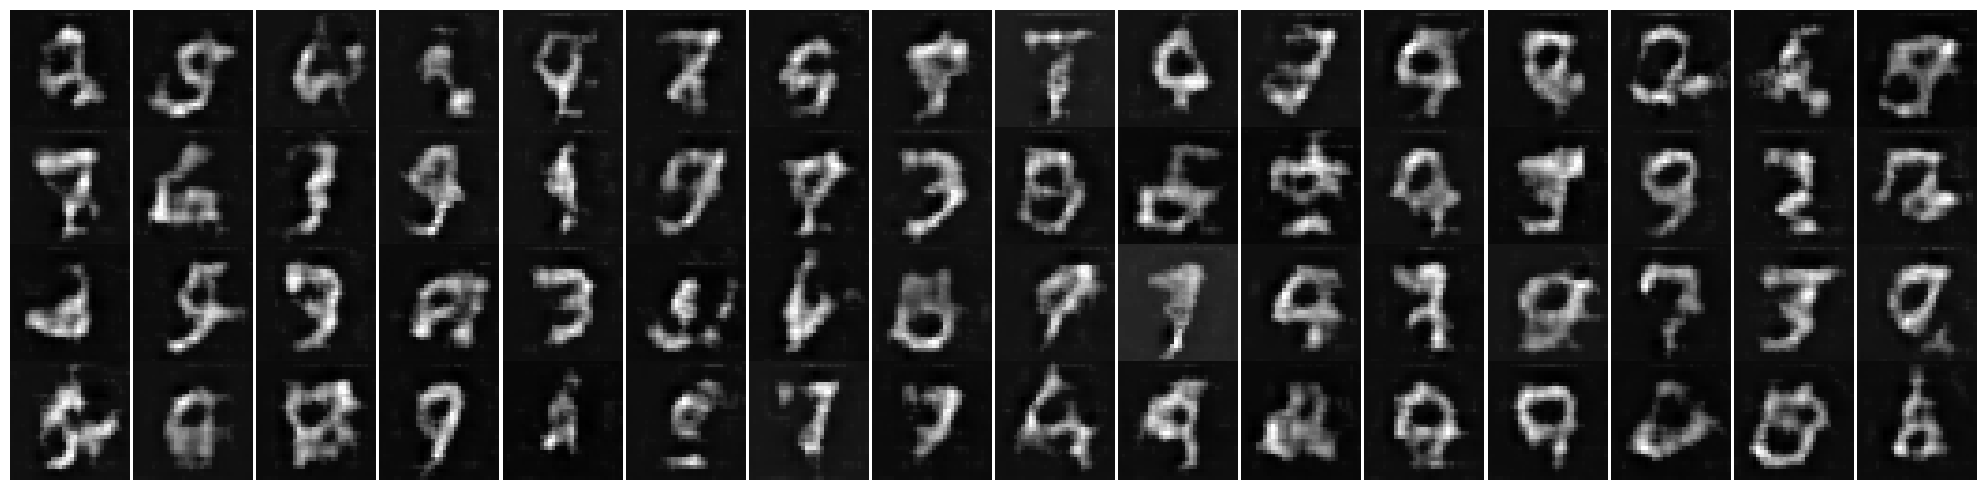

.............................................................................................................................................................
[12/100]: ----------------- Loss D: 3722.96016, Loss G: 14953.38289
.............................................................................................................................................................
[13/100]: ----------------- Loss D: 3791.76830, Loss G: 14712.44283
.............................................................................................................................................................
[14/100]: ----------------- Loss D: 3838.29060, Loss G: 14818.59209
.............................................................................................................................................................
[15/100]: ----------------- Loss D: 4014.58215, Loss G: 14518.57065
................................................................................................

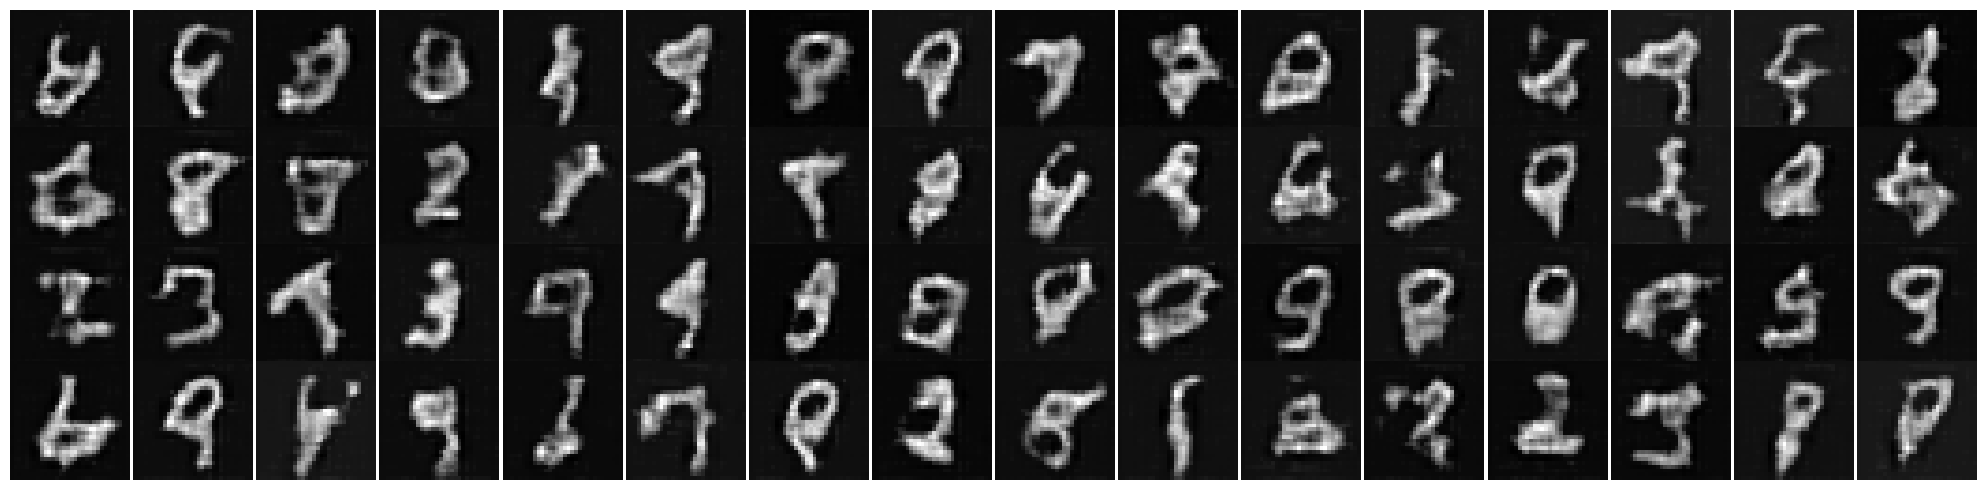

.............................................................................................................................................................
[17/100]: ----------------- Loss D: 4347.32499, Loss G: 13473.53292
.............................................................................................................................................................
[18/100]: ----------------- Loss D: 4425.98935, Loss G: 13255.91270
.............................................................................................................................................................
[19/100]: ----------------- Loss D: 4476.79542, Loss G: 13209.80202
.............................................................................................................................................................
[20/100]: ----------------- Loss D: 4537.90096, Loss G: 13007.94448
................................................................................................

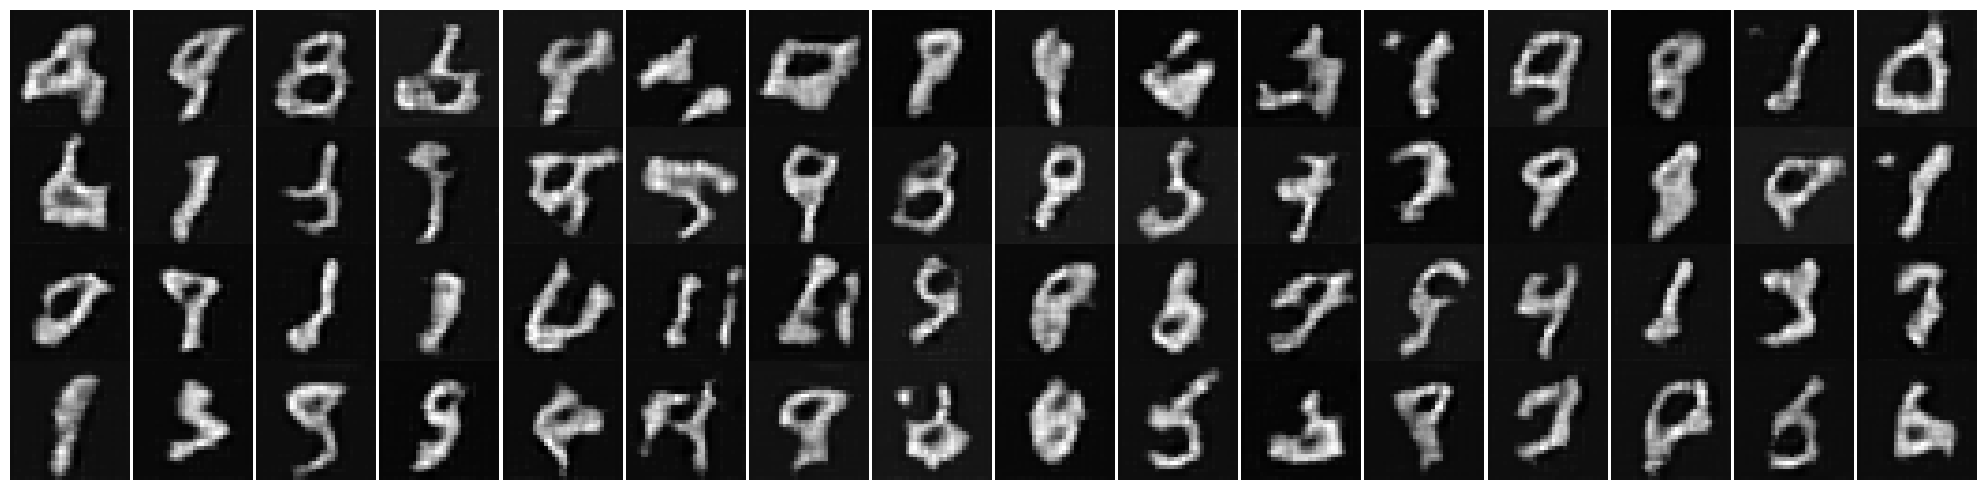

.............................................................................................................................................................
[22/100]: ----------------- Loss D: 4505.46352, Loss G: 13099.49524
.............................................................................................................................................................
[23/100]: ----------------- Loss D: 4471.87067, Loss G: 13148.15730
.............................................................................................................................................................
[24/100]: ----------------- Loss D: 4500.92740, Loss G: 13195.61321
.............................................................................................................................................................
[25/100]: ----------------- Loss D: 4531.12600, Loss G: 13094.69775
................................................................................................

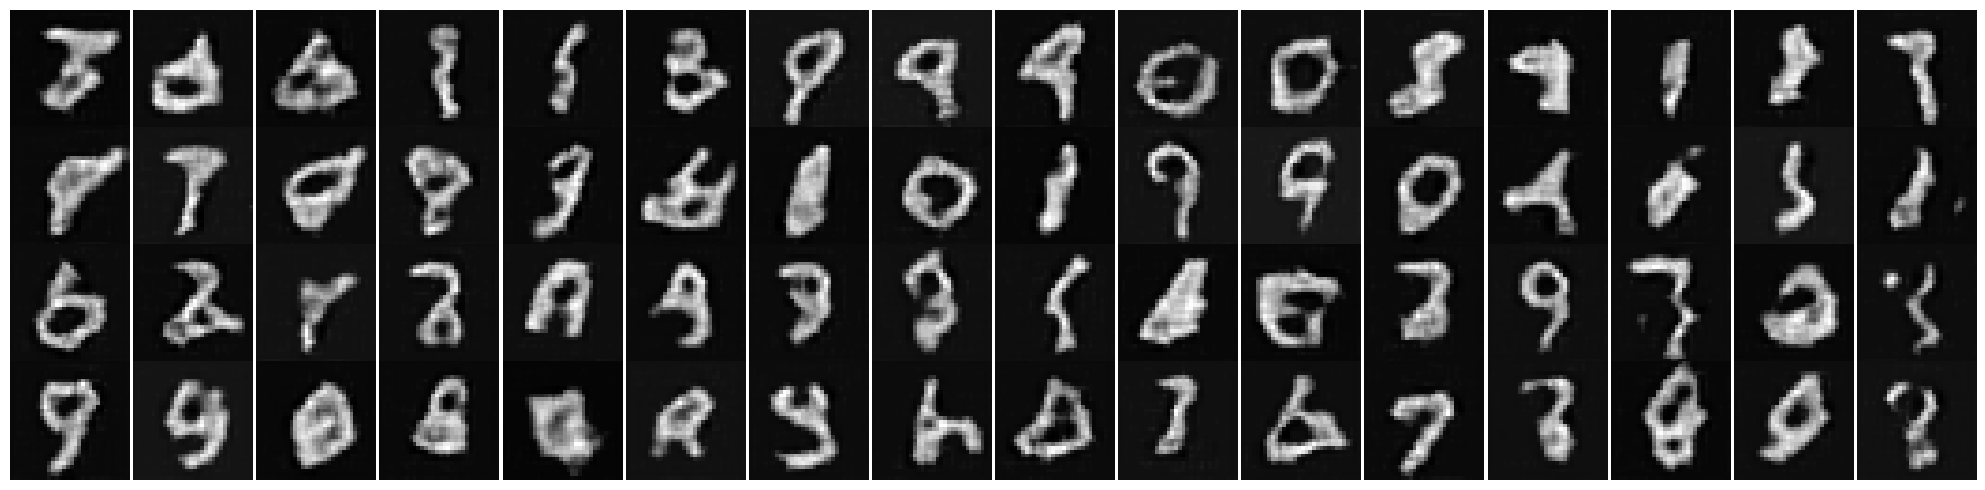

.............................................................................................................................................................
[27/100]: ----------------- Loss D: 4678.24946, Loss G: 12911.98120
.............................................................................................................................................................
[28/100]: ----------------- Loss D: 4709.54670, Loss G: 12803.41396
.............................................................................................................................................................
[29/100]: ----------------- Loss D: 4732.33157, Loss G: 12818.46674
.............................................................................................................................................................
[30/100]: ----------------- Loss D: 4771.46377, Loss G: 12753.88127
................................................................................................

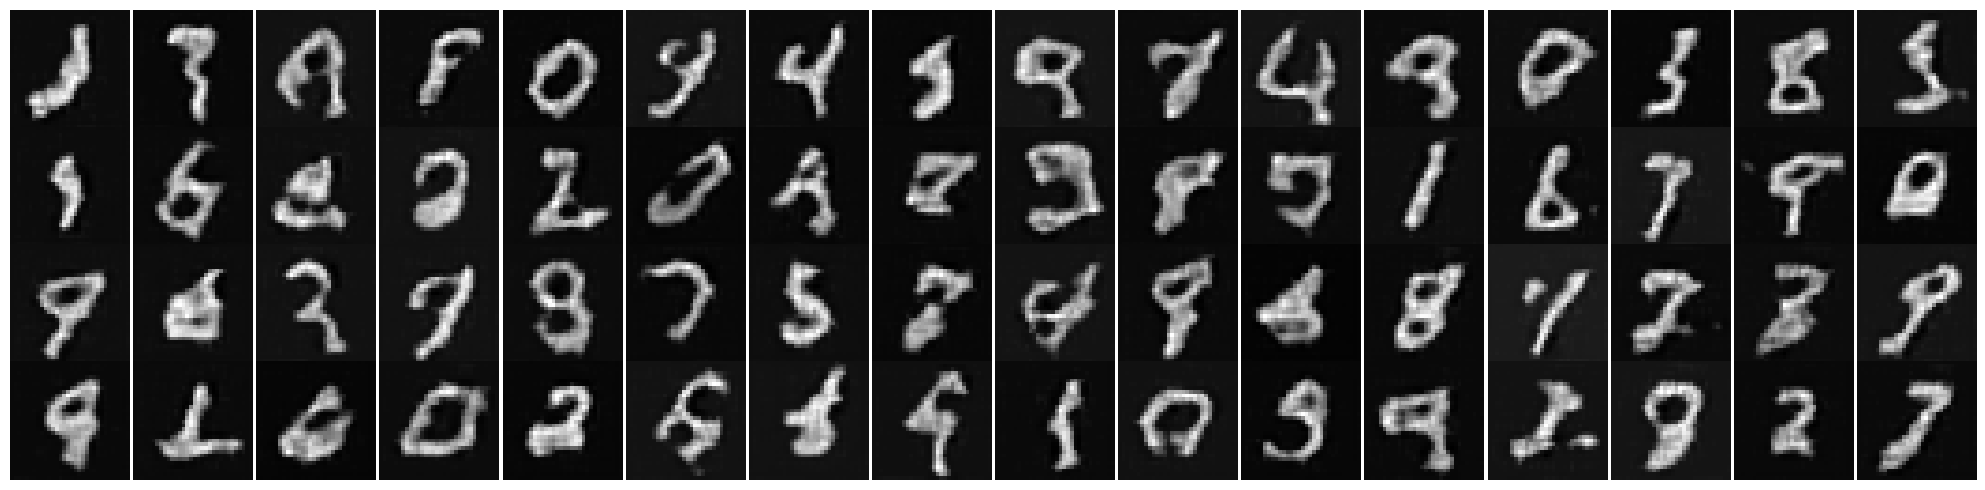

.............................................................................................................................................................
[32/100]: ----------------- Loss D: 4699.58645, Loss G: 13016.80160
.............................................................................................................................................................
[33/100]: ----------------- Loss D: 4692.06424, Loss G: 12950.11918
.............................................................................................................................................................
[34/100]: ----------------- Loss D: 4638.30697, Loss G: 13115.52406
.............................................................................................................................................................
[35/100]: ----------------- Loss D: 4632.81603, Loss G: 13208.93476
................................................................................................

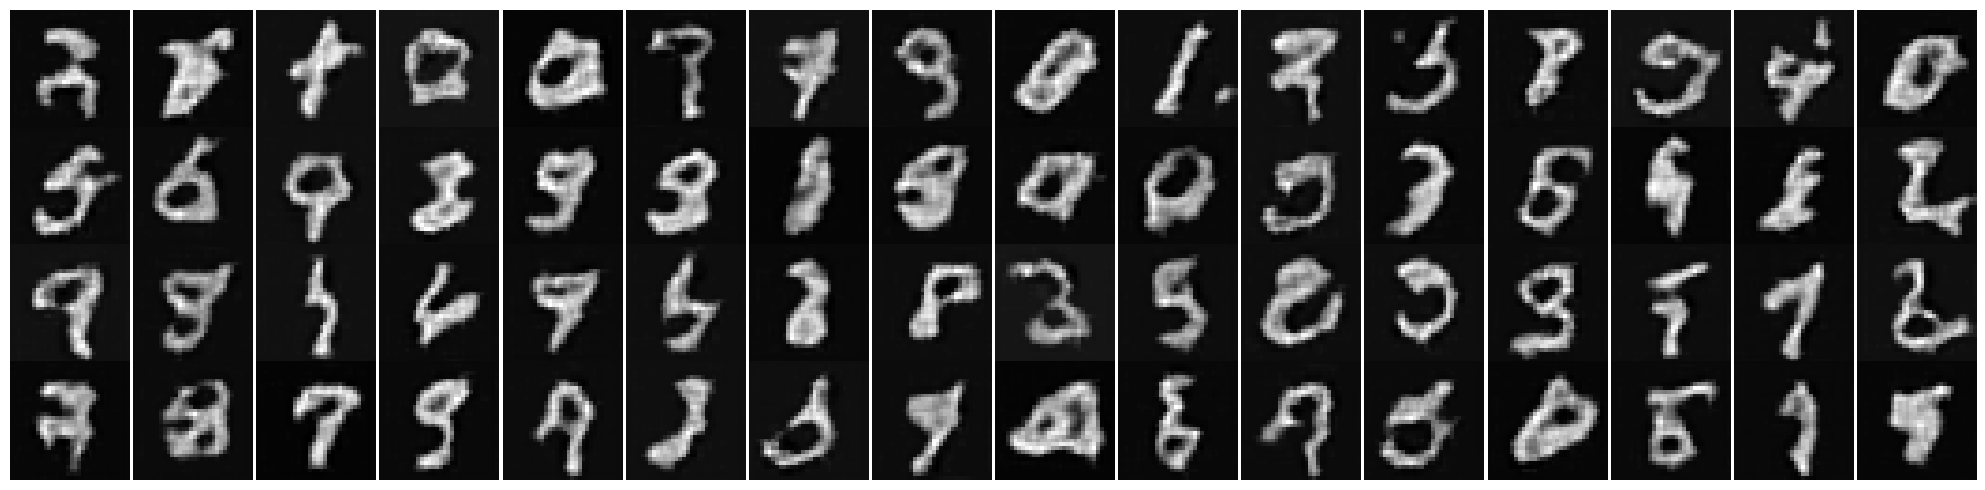

.............................................................................................................................................................
[37/100]: ----------------- Loss D: 4629.21266, Loss G: 13331.20882
.............................................................................................................................................................
[38/100]: ----------------- Loss D: 4638.02278, Loss G: 13226.50897
.............................................................................................................................................................
[39/100]: ----------------- Loss D: 4598.48402, Loss G: 13334.51652
.............................................................................................................................................................
[40/100]: ----------------- Loss D: 4648.00164, Loss G: 13164.67243
................................................................................................

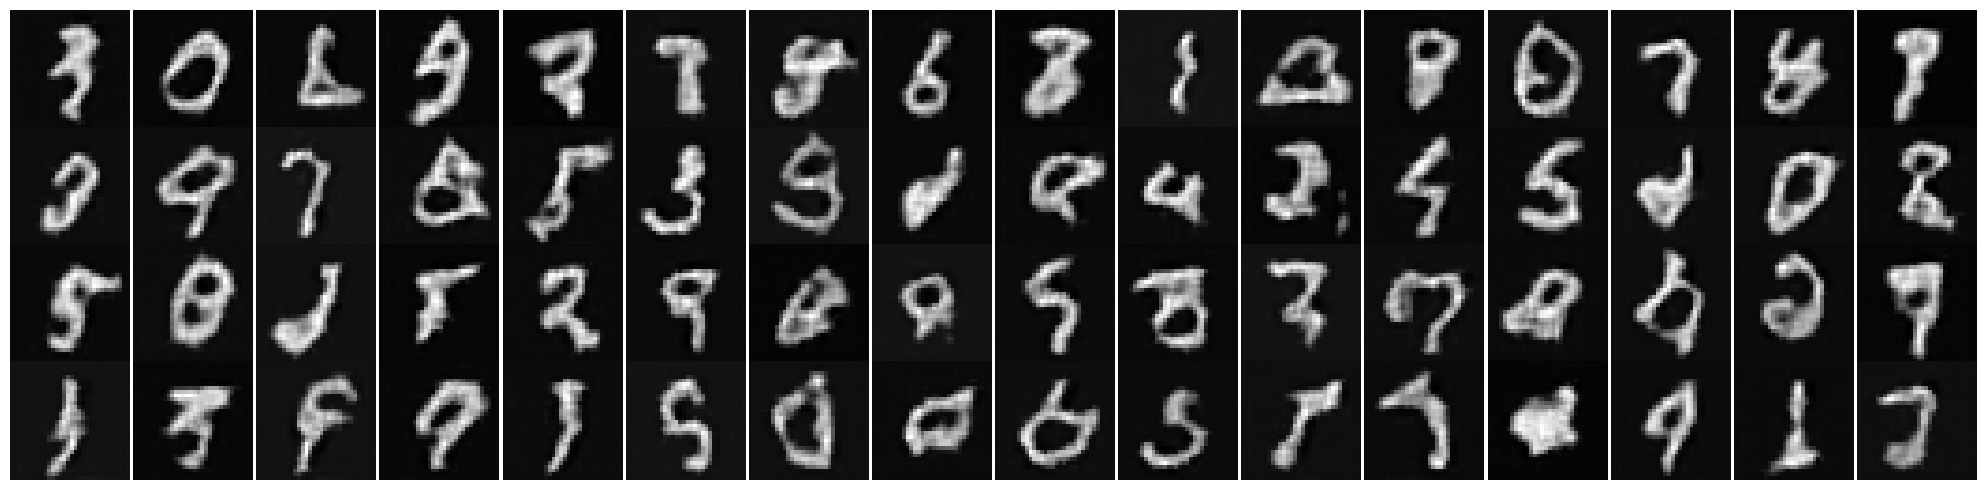

.............................................................................................................................................................
[42/100]: ----------------- Loss D: 4617.24562, Loss G: 13207.77790
.............................................................................................................................................................
[43/100]: ----------------- Loss D: 4659.55107, Loss G: 13217.27905
.............................................................................................................................................................
[44/100]: ----------------- Loss D: 4678.06904, Loss G: 13155.32020
.............................................................................................................................................................
[45/100]: ----------------- Loss D: 4618.37939, Loss G: 13244.68527
................................................................................................

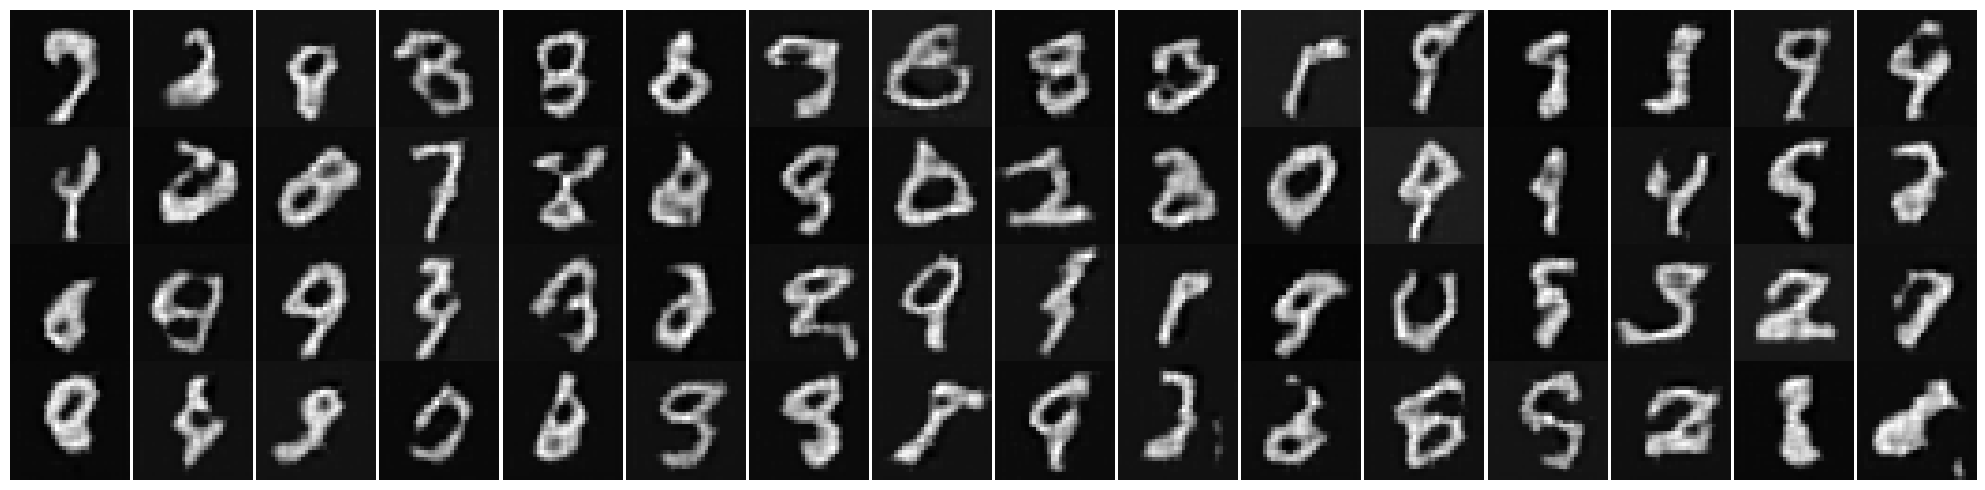

.............................................................................................................................................................
[47/100]: ----------------- Loss D: 4625.71270, Loss G: 13385.26951
.............................................................................................................................................................
[48/100]: ----------------- Loss D: 4665.37673, Loss G: 13289.22246
.............................................................................................................................................................
[49/100]: ----------------- Loss D: 4662.43961, Loss G: 13308.28551
.............................................................................................................................................................
[50/100]: ----------------- Loss D: 4655.17816, Loss G: 13287.26915
................................................................................................

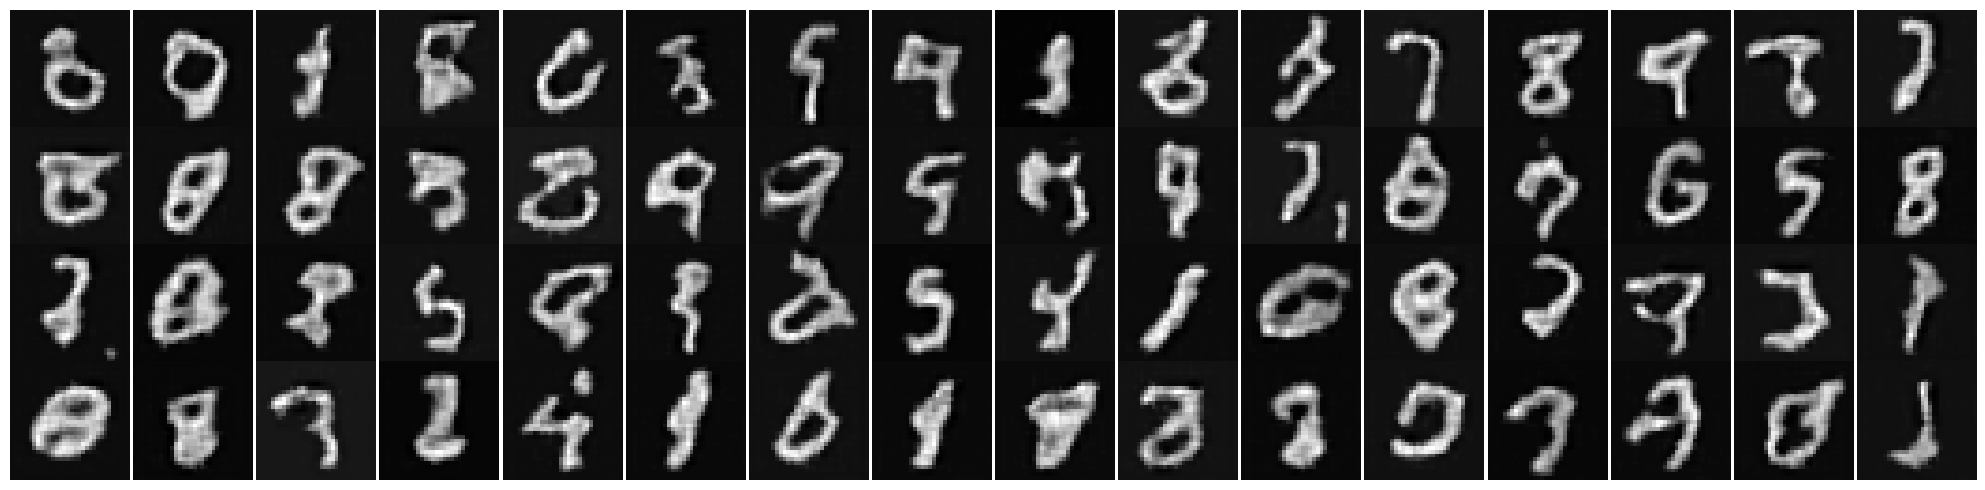

.............................................................................................................................................................
[52/100]: ----------------- Loss D: 4636.39168, Loss G: 13463.77656
.............................................................................................................................................................
[53/100]: ----------------- Loss D: 4637.25784, Loss G: 13374.13595
.............................................................................................................................................................
[54/100]: ----------------- Loss D: 4649.07051, Loss G: 13409.35001
.............................................................................................................................................................
[55/100]: ----------------- Loss D: 4597.06251, Loss G: 13444.74590
................................................................................................

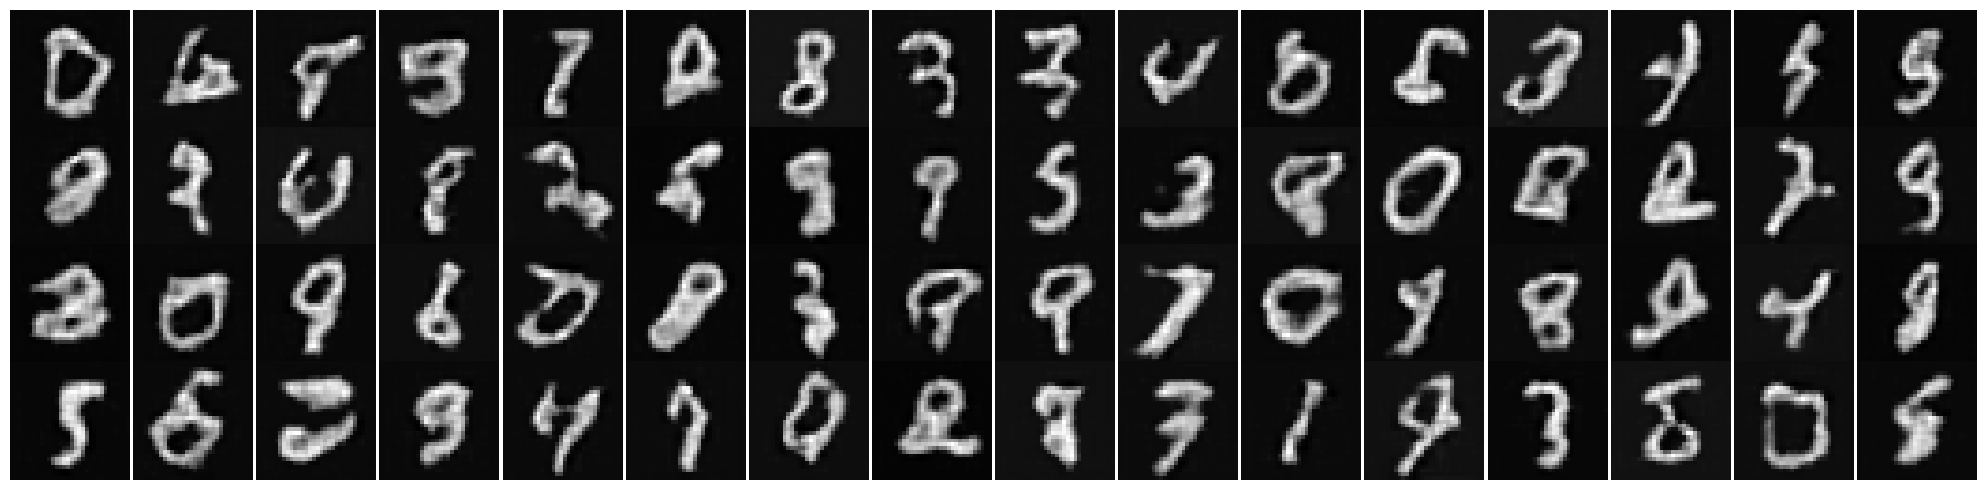

.............................................................................................................................................................
[57/100]: ----------------- Loss D: 4621.02936, Loss G: 13491.65661
.............................................................................................................................................................
[58/100]: ----------------- Loss D: 4608.89688, Loss G: 13465.94604
.............................................................................................................................................................
[59/100]: ----------------- Loss D: 4611.42031, Loss G: 13515.46544
.............................................................................................................................................................
[60/100]: ----------------- Loss D: 4618.20205, Loss G: 13521.95324
................................................................................................

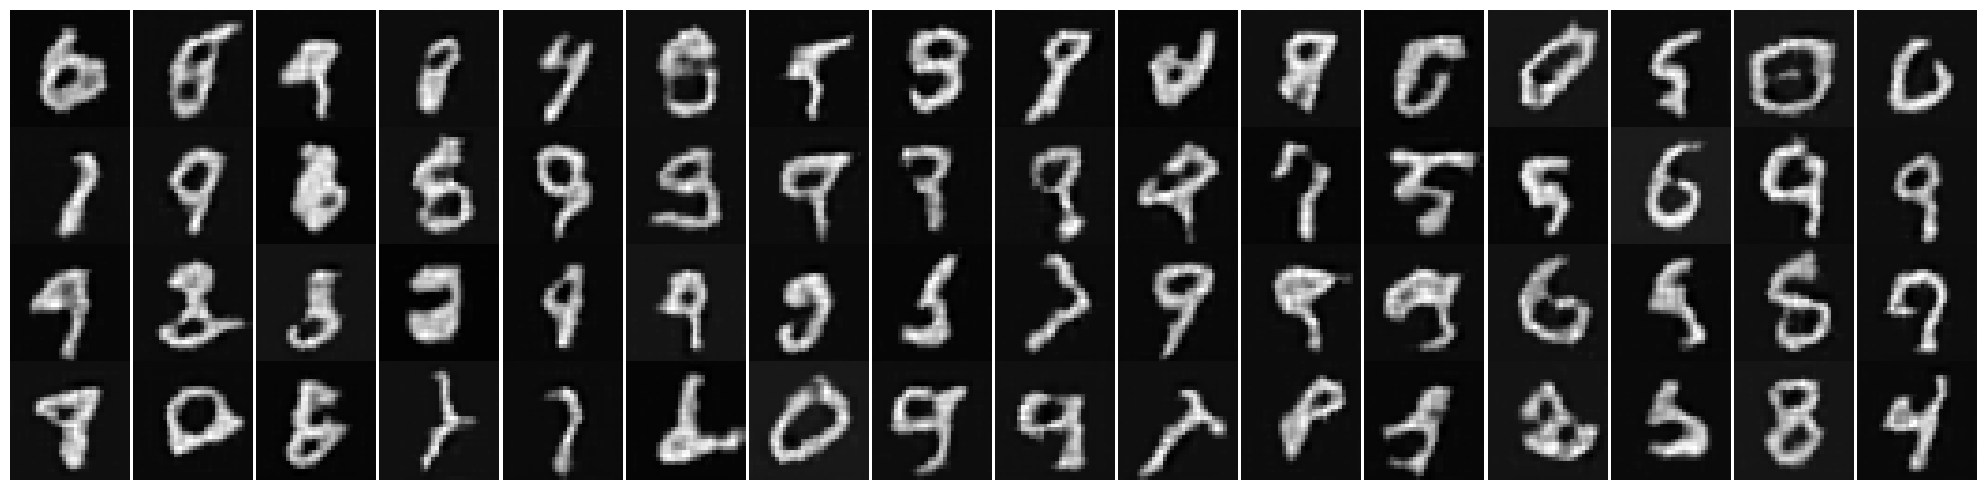

.............................................................................................................................................................
[62/100]: ----------------- Loss D: 4603.32799, Loss G: 13515.32271
.............................................................................................................................................................
[63/100]: ----------------- Loss D: 4576.65790, Loss G: 13604.03440
.............................................................................................................................................................
[64/100]: ----------------- Loss D: 4568.16371, Loss G: 13694.09532
.............................................................................................................................................................
[65/100]: ----------------- Loss D: 4568.24672, Loss G: 13711.75198
................................................................................................

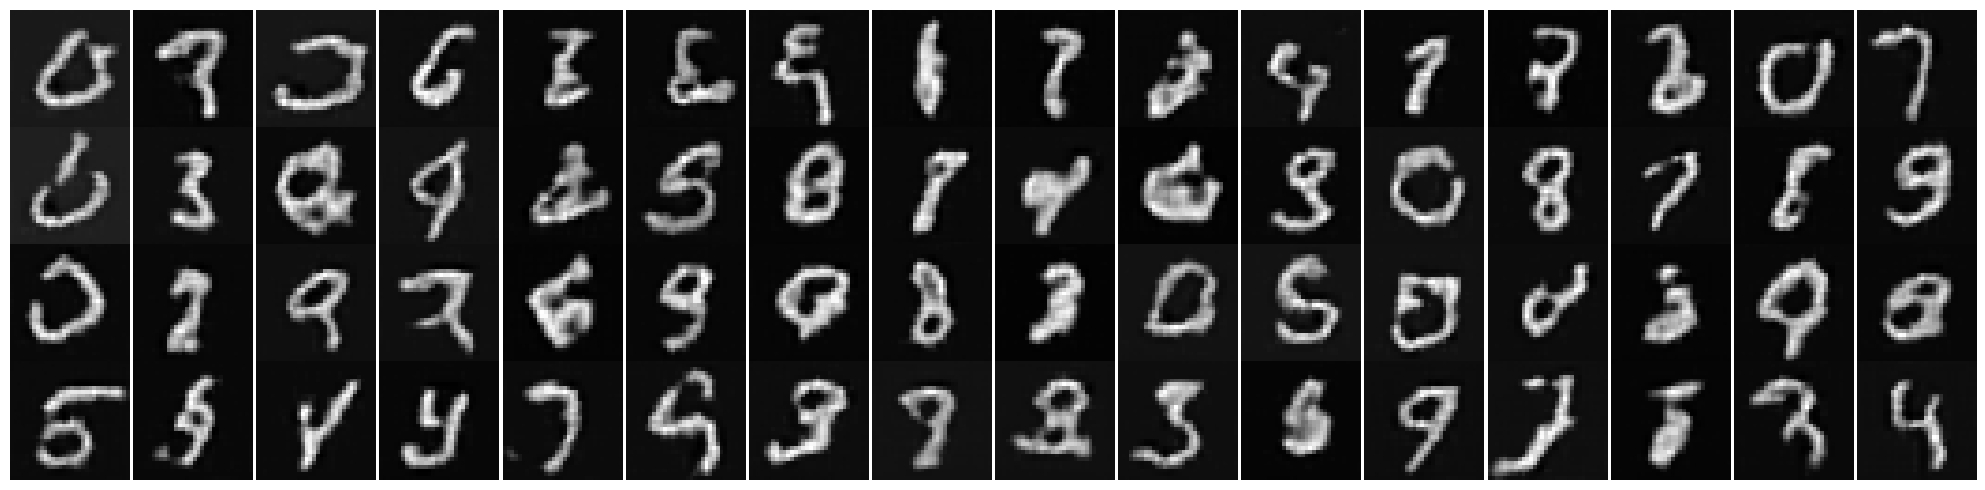

.............................................................................................................................................................
[67/100]: ----------------- Loss D: 4577.35882, Loss G: 13705.31238
.............................................................................................................................................................
[68/100]: ----------------- Loss D: 4491.69468, Loss G: 13833.79771
.............................................................................................................................................................
[69/100]: ----------------- Loss D: 4485.41215, Loss G: 13939.67463
.............................................................................................................................................................
[70/100]: ----------------- Loss D: 4484.88016, Loss G: 13833.76362
................................................................................................

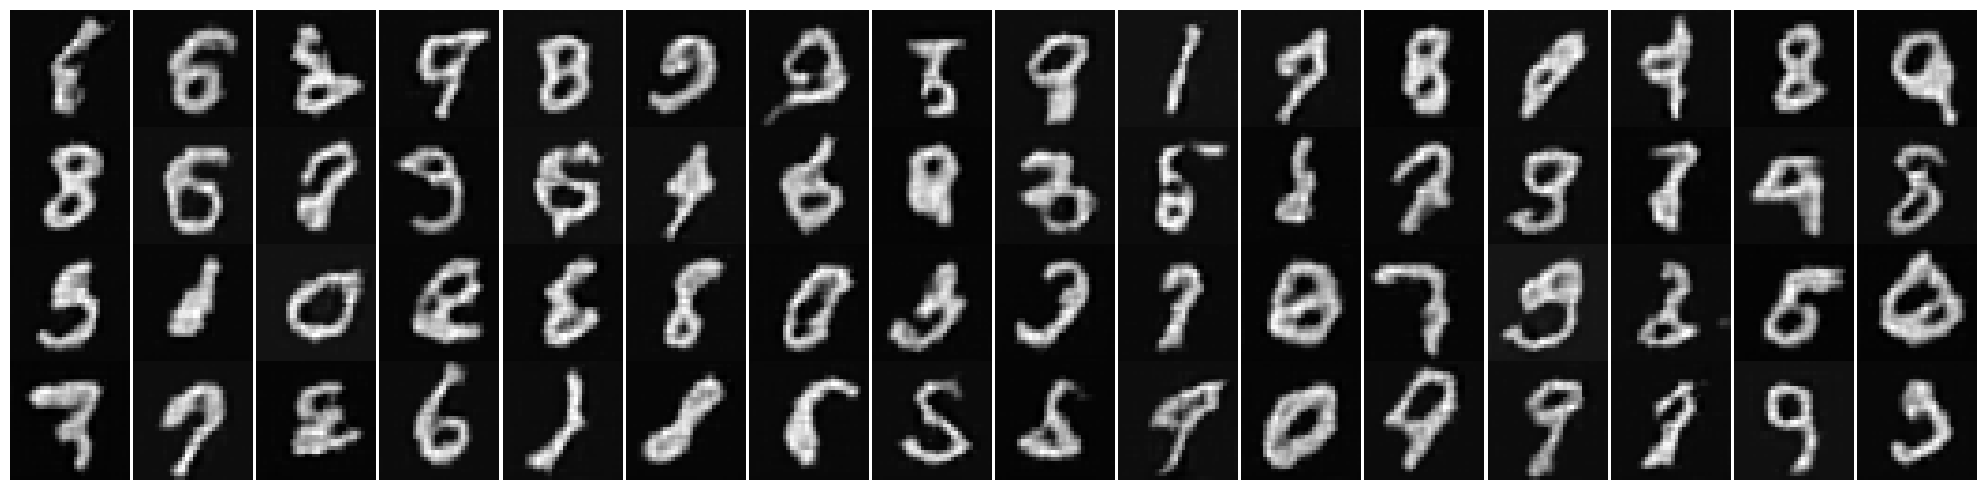

.............................................................................................................................................................
[72/100]: ----------------- Loss D: 4483.63697, Loss G: 13921.45539
.............................................................................................................................................................
[73/100]: ----------------- Loss D: 4431.84591, Loss G: 14136.86368
.............................................................................................................................................................
[74/100]: ----------------- Loss D: 4433.52487, Loss G: 14260.11801
.............................................................................................................................................................
[75/100]: ----------------- Loss D: 4423.69138, Loss G: 14312.12705
................................................................................................

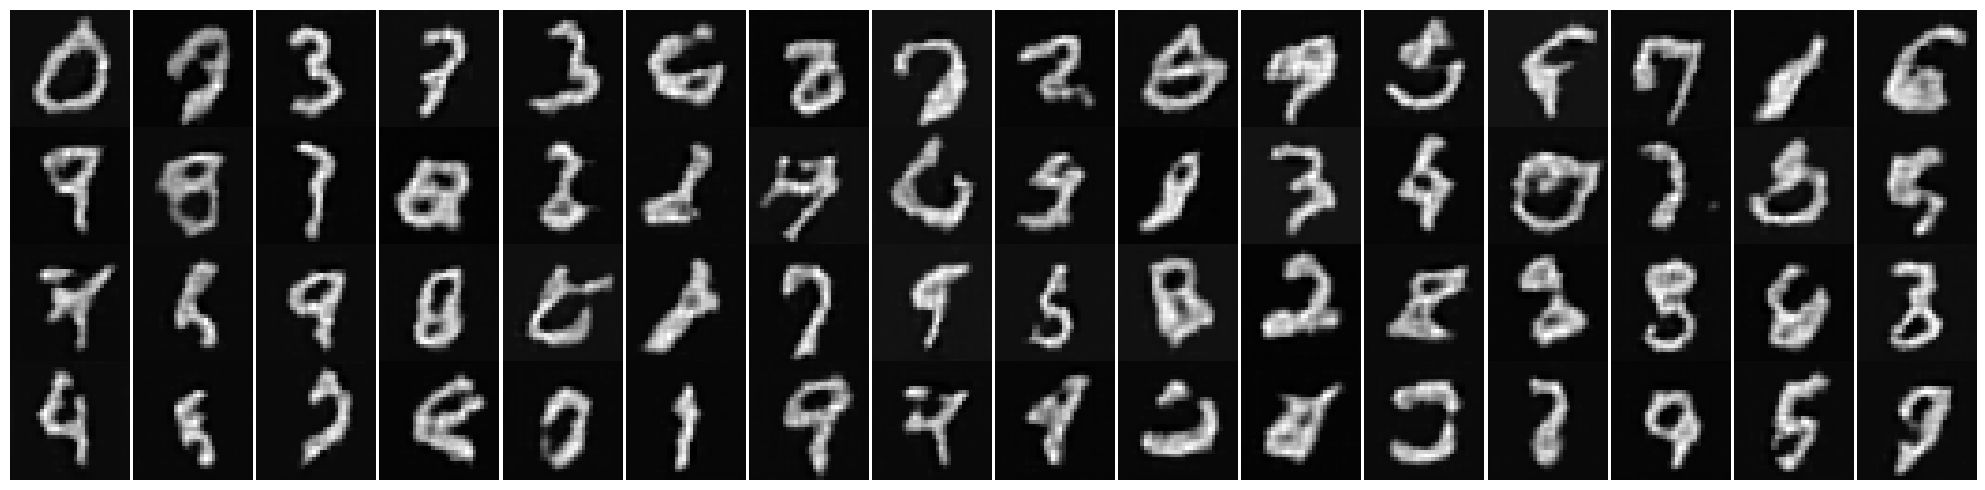

.............................................................................................................................................................
[77/100]: ----------------- Loss D: 4429.58136, Loss G: 14273.22220
.............................................................................................................................................................
[78/100]: ----------------- Loss D: 4357.82611, Loss G: 14438.16751
.............................................................................................................................................................
[79/100]: ----------------- Loss D: 4376.37295, Loss G: 14392.28817
.............................................................................................................................................................
[80/100]: ----------------- Loss D: 4356.95822, Loss G: 14462.88553
................................................................................................

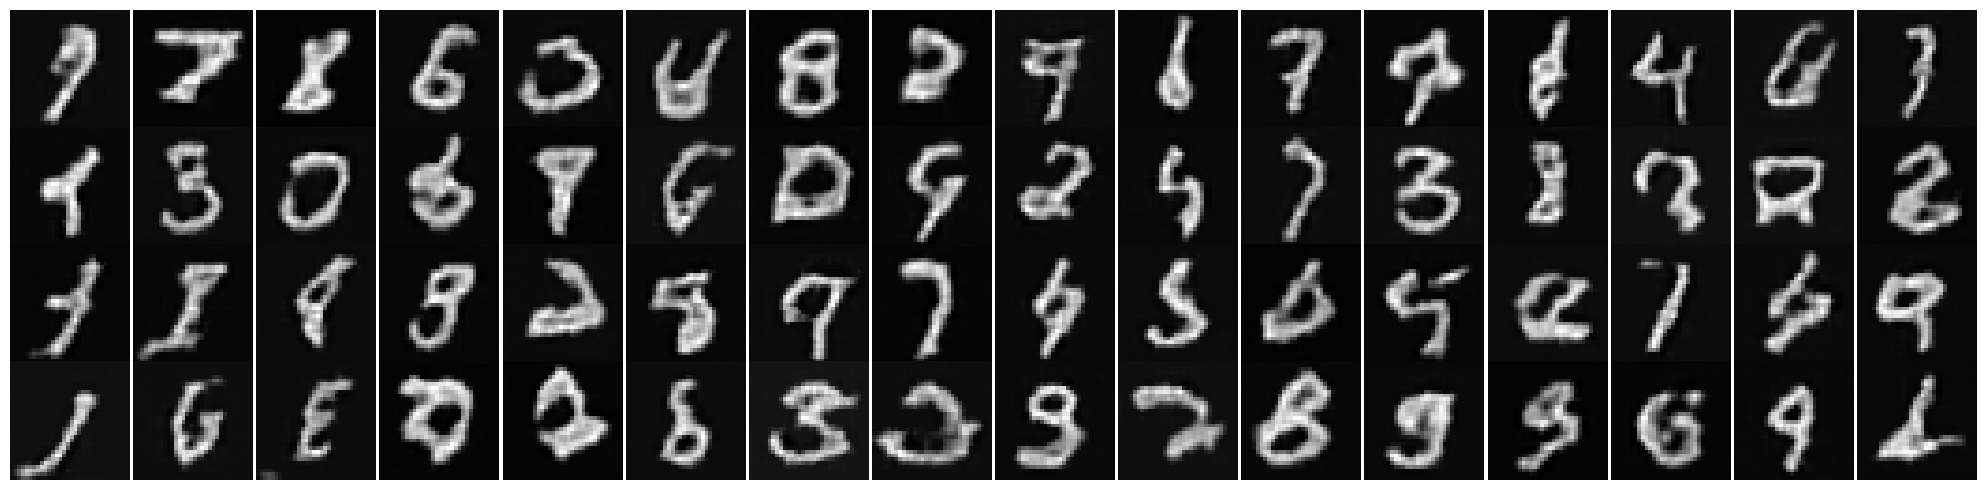

.............................................................................................................................................................
[82/100]: ----------------- Loss D: 4346.74210, Loss G: 14571.47999
.............................................................................................................................................................
[83/100]: ----------------- Loss D: 4347.92847, Loss G: 14478.95900
.............................................................................................................................................................
[84/100]: ----------------- Loss D: 4318.70203, Loss G: 14601.70241
.............................................................................................................................................................
[85/100]: ----------------- Loss D: 4337.41616, Loss G: 14718.79315
................................................................................................

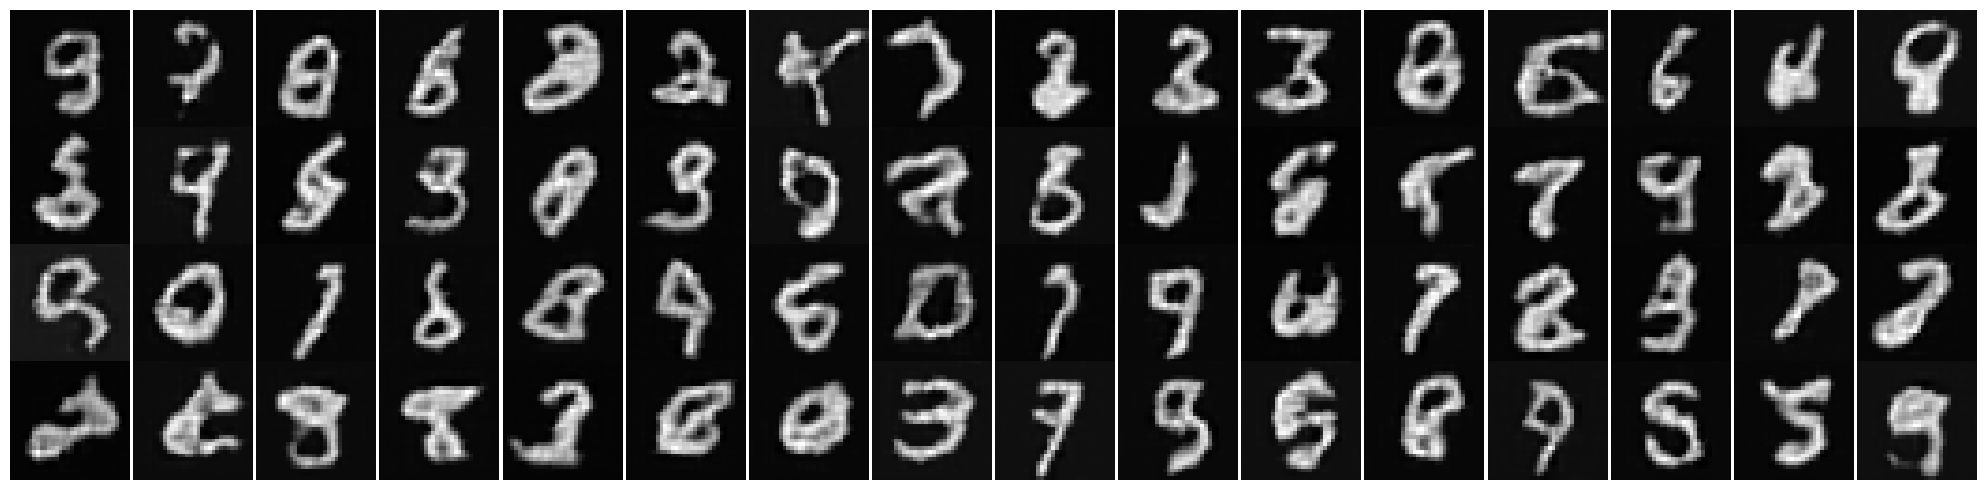

.............................................................................................................................................................
[87/100]: ----------------- Loss D: 4313.53086, Loss G: 14878.93555
.............................................................................................................................................................
[88/100]: ----------------- Loss D: 4308.93362, Loss G: 14882.81032
.............................................................................................................................................................
[89/100]: ----------------- Loss D: 4281.73516, Loss G: 14858.57238
.............................................................................................................................................................
[90/100]: ----------------- Loss D: 4278.30917, Loss G: 14904.57727
................................................................................................

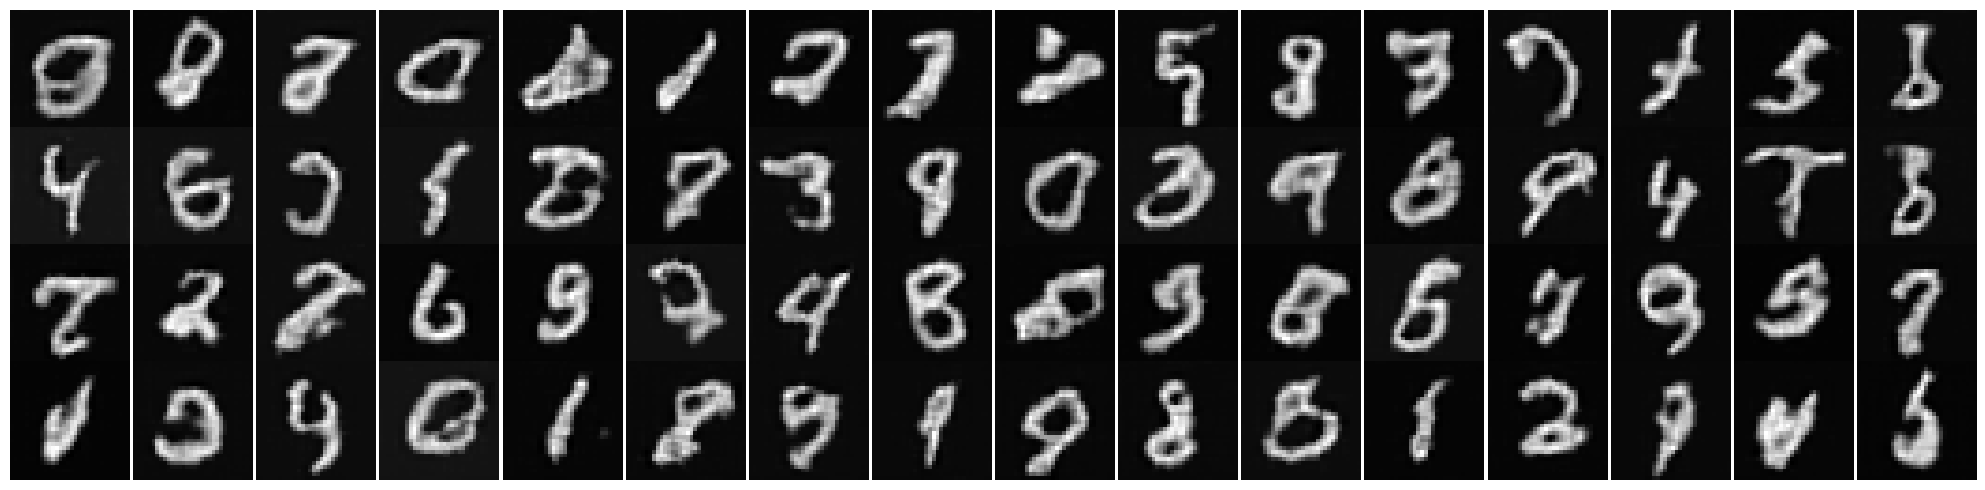

.............................................................................................................................................................
[92/100]: ----------------- Loss D: 4249.68373, Loss G: 15031.88643
.............................................................................................................................................................
[93/100]: ----------------- Loss D: 4248.10825, Loss G: 15027.81522
.............................................................................................................................................................
[94/100]: ----------------- Loss D: 4215.02209, Loss G: 15134.83271
.............................................................................................................................................................
[95/100]: ----------------- Loss D: 4177.48526, Loss G: 15160.71777
................................................................................................

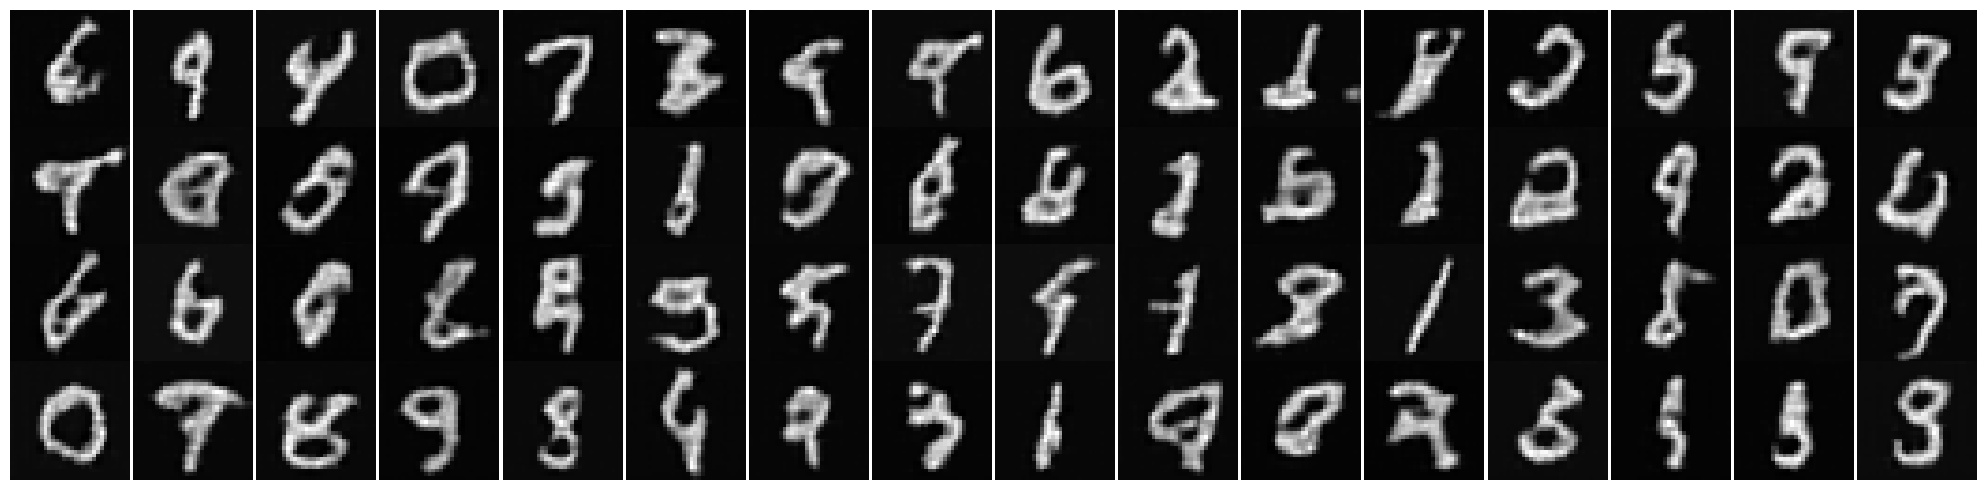

.............................................................................................................................................................
[97/100]: ----------------- Loss D: 4194.27728, Loss G: 15344.39478
.............................................................................................................................................................
[98/100]: ----------------- Loss D: 4166.94947, Loss G: 15219.71243
.............................................................................................................................................................
[99/100]: ----------------- Loss D: 4147.32420, Loss G: 15342.54070
.............................................................................................................................................................
[100/100]: ----------------- Loss D: 4169.87931, Loss G: 15285.40349


In [44]:
fakes = []
gen_losses = []
disc_losses = []

for epoch in range(n_epochs):
    runnning_loss_disc = 0
    runnning_loss_gen = 0
    
    for batch_ind, (images, _) in enumerate(loader):
        images = images.to(device)  
        z = torch.randn((images.shape[0], z_size)).to(device)
        fake_images = gen(z)
        
        # ------------------ train discriminator
        optim_disc.zero_grad()
        loss_disc = disc.loss(images, fake_images)
        loss_disc.backward(retain_graph=True)
        optim_disc.step()
        runnning_loss_disc += loss_disc.mean().item() * images.shape[0]
               
        # ------------------ train generator
        optim_gen.zero_grad()
        loss_gen = gen.loss(disc(fake_images))
        loss_gen.backward(retain_graph=True)
        optim_gen.step()
        runnning_loss_gen += loss_gen.mean().item() * images.shape[0]
        print('.', end='')
        
        
    disc_losses.append( runnning_loss_disc/ len(dataset) )
    gen_losses.append( runnning_loss_gen/ len(dataset) )
    print(f'\n[{epoch+1}/{n_epochs}]: ----------------- Loss D: {runnning_loss_disc:0.5f}, Loss G: {runnning_loss_gen:0.5f}')
    
    
    with torch.no_grad():
        noise = torch.randn(Batch_size, z_size).to(device)
        fake_batch = gen( noise ).detach().cpu()
        fakes.append( fake_batch )
        
        if epoch % 5 == 0:
            fig, ax = plt.subplots(4, 16, figsize=(20, 5))
            ax = ax.ravel()
            for image_ind in range(fake_batch.shape[0]):
                ax[image_ind].imshow( fake_batch[image_ind].permute(1,2,0), cmap='gray')
                ax[image_ind].axis('off')
            fig.tight_layout(h_pad=0, w_pad=0)
            plt.show()


# Plot losses over time

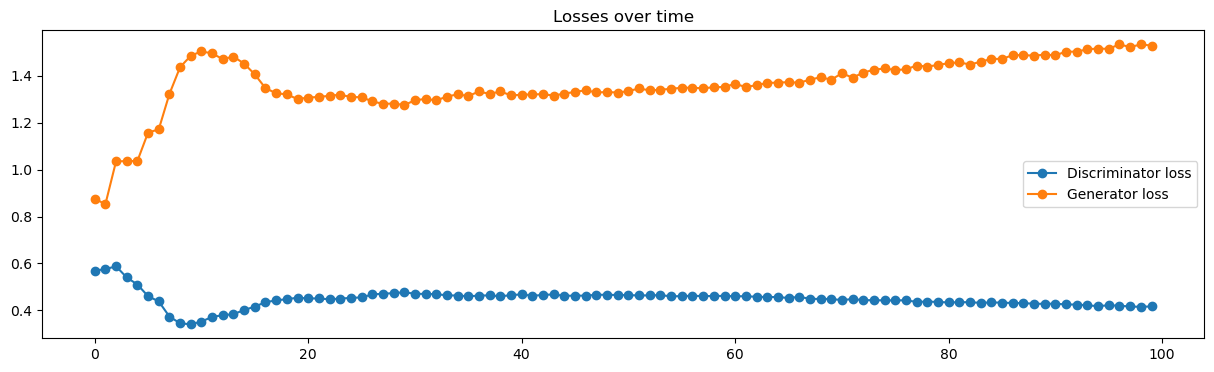

In [45]:
plt.figure(figsize=(15, 4))
plt.plot( np.array(disc_losses), marker='o', label='Discriminator loss')
plt.plot( np.array(gen_losses), marker='o', label='Generator loss')
plt.title('Losses over time')
plt.legend()

# Interactive plotting of generative outputs

In [50]:
def plot_grid(epoch=0):
    fake = fakes[epoch]
    
    fig, ax = plt.subplots(4,16, figsize=(20, 6))
    ax = ax.ravel()
    
    for image_ind in range(fake.shape[0]):
        ax[image_ind].imshow( fake[image_ind].permute(1,2,0) )
        ax[image_ind].axis('off')
    fig.tight_layout(h_pad=0, w_pad=0)
    
epoch = widgets.IntSlider(0, 0, n_epochs-1, 1, layout=Layout(width='90%'))
_ = widgets.interact(plot_grid, epoch=epoch)

interactive(children=(IntSlider(value=0, description='epoch', layout=Layout(width='90%'), max=99), Output()), …